In [1]:
import pandas as pd
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
from datasets import DatasetDict, load_from_disk, Dataset, concatenate_datasets, load
import re

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from datasets import load_dataset,Dataset
dataset = load_dataset("squad_kor_v1")

Found cached dataset squad_kor_v1 (/opt/ml/.cache/huggingface/datasets/squad_kor_v1/squad_kor_v1/1.0.0/18d4f44736b8ee85671f63cb84965bfb583fa0a4ff2df3c2e10eee9693796725)
100%|██████████| 2/2 [00:00<00:00, 367.31it/s]


In [3]:
import random

In [4]:
dataset['train']['context'][3]

'1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로 해서 하나의 교향곡을 쓰려는 뜻을 갖는다. 이 시기 바그너는 1838년에 빛 독촉으로 산전수전을 다 걲은 상황이라 좌절과 실망에 가득했으며 메피스토펠레스를 만나는 파우스트의 심경에 공감했다고 한다. 또한 파리에서 아브네크의 지휘로 파리 음악원 관현악단이 연주하는 베토벤의 교향곡 9번을 듣고 깊은 감명을 받았는데, 이것이 이듬해 1월에 파우스트의 서곡으로 쓰여진 이 작품에 조금이라도 영향을 끼쳤으리라는 것은 의심할 여지가 없다. 여기의 라단조 조성의 경우에도 그의 전기에 적혀 있는 것처럼 단순한 정신적 피로나 실의가 반영된 것이 아니라 베토벤의 합창교향곡 조성의 영향을 받은 것을 볼 수 있다. 그렇게 교향곡 작곡을 1839년부터 40년에 걸쳐 파리에서 착수했으나 1악장을 쓴 뒤에 중단했다. 또한 작품의 완성과 동시에 그는 이 서곡(1악장)을 파리 음악원의 연주회에서 연주할 파트보까지 준비하였으나, 실제로는 이루어지지는 않았다. 결국 초연은 4년 반이 지난 후에 드레스덴에서 연주되었고 재연도 이루어졌지만, 이후에 그대로 방치되고 말았다. 그 사이에 그는 리엔치와 방황하는 네덜란드인을 완성하고 탄호이저에도 착수하는 등 분주한 시간을 보냈는데, 그런 바쁜 생활이 이 곡을 잊게 한 것이 아닌가 하는 의견도 있다.'

In [5]:
import pandas as pd
tmp = pd.DataFrame(dataset['train'])

In [6]:
tmp

,id,title,context,question,answers
0,6566495-0-0,파우스트_서곡,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,바그너는 괴테의 파우스트를 읽고 무엇을 쓰고자 했는가?,"{'text': ['교향곡'], 'answer_start': [54]}"
1,6566495-0-1,파우스트_서곡,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,바그너는 교향곡 작곡을 어디까지 쓴 뒤에 중단했는가?,"{'text': ['1악장'], 'answer_start': [421]}"
2,6566495-0-2,파우스트_서곡,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,바그너가 파우스트 서곡을 쓸 때 어떤 곡의 영향을 받았는가?,"{'text': ['베토벤의 교향곡 9번'], 'answer_start': [194]}"
3,6566518-0-0,파우스트_서곡,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,1839년 바그너가 교향곡의 소재로 쓰려고 했던 책은?,"{'text': ['파우스트'], 'answer_start': [15]}"
4,6566518-0-1,파우스트_서곡,1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...,파우스트 서곡의 라단조 조성이 영향을 받은 베토벤의 곡은?,"{'text': ['합창교향곡'], 'answer_start': [354]}"
...,...,...,...,...,...
60402,6467478-1-1,뉴델리_메탈로-베타락타마제,"유전자의 이름은 인도의 수도 뉴델리의 이름을 따 붙여졌는데, 이는 2009년 용 (...",뉴델리 메탈로 베타락마제가 처음 감염 된 지역은 어디인가?,"{'text': ['인도'], 'answer_start': [73]}"
60403,6467478-2-0,뉴델리_메탈로-베타락타마제,"2010년 8월, 저널 The Lancet Infectious Diseases에 최...",균은 유전자를 균에게 전달 할 수있는데 이러한 현상을 나타낸 용어는 무엇인가?,"{'text': ['유전자 전달'], 'answer_start': [253]}"
60404,6467478-2-1,뉴델리_메탈로-베타락타마제,"2010년 8월, 저널 The Lancet Infectious Diseases에 최...",박테리아가 NDM-1 유전자를 가지고 있을때 발생하는 전파를 분석하기위해 사용된 영...,"{'text': ['37건'], 'answer_start': [129]}"
60405,6490801-2-0,뉴델리_메탈로-베타락타마제,"2010년 8월, 저널 The Lancet Infectious Diseases에 최...",NDM-1 유전자를 가진 박테리아가 감수성을 보인 폴리믹슨 계열 항생제는?,"{'text': ['콜리스틴'], 'answer_start': [404]}"


In [7]:
tmp['context_len']=tmp['context'].apply(lambda x: len(x))

In [8]:
import pandas as pd
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
from datasets import DatasetDict, load_from_disk, Dataset, concatenate_datasets
import re

In [9]:
tmp['context_len'].describe()

count    60407.000000
mean       519.268181
std        215.609530
min        348.000000
25%        395.000000
50%        462.000000
75%        574.000000
max      10012.000000
Name: context_len, dtype: float64

In [10]:
korquad_count= []
for i in range(0,200):
    korquad_count.append(len(tmp[(tmp['context_len']>i*10)&(tmp['context_len']<=(i+1)*10)]))

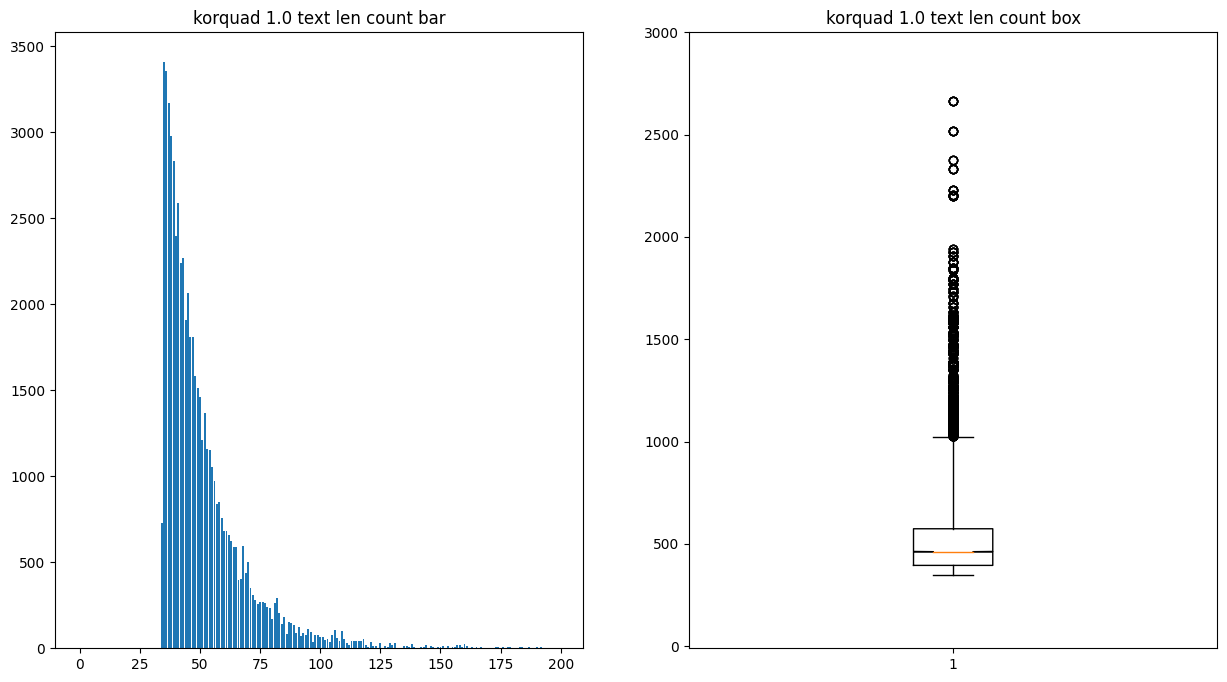

In [11]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.bar(range(0,200),korquad_count)
ax1.set_title('korquad 1.0 text len count bar')
ax2.boxplot([tmp['context_len']],notch=True,whis=2.5)
ax2.set_ylim(-10.0, 3000.0)
ax2.set_xticks([1])
ax2.set_title('korquad 1.0 text len count box')
plt.show()

In [184]:
# http://zeany.net/46
def preprocess_context(example):
    body = re.sub('<title.*?>.*?</title>', '', example, 0, re.I|re.S)
    body = re.sub('<table.*?>.*?</table>', '', body, 0, re.I|re.S)
    body = re.sub('<td.*?>.*?</td>', '', body, 0, re.I|re.S)
    body = re.sub('<li.*?>.*?</li>', '', body, 0, re.I|re.S)
    body = re.sub('<ol.*?>.*?</ol>', '', body, 0, re.I|re.S)
    text = re.sub('<.+?>', '', body, 0, re.I|re.S)
    text = re.sub('\[[0-9]+\]', ' ', text, 0, re.I|re.S)
    text = texts.replace("[편집]","")
    text = text.replace("\\'","")
    text = text.replace("펼치기","")
    text = text.replace("버튼 클릭","")
    text = text.split("같이 보기")[0]
    text = text.split("참고 자료")[0]
    text = text.split("외부 링크")[0]
    text = text.split("원본 주소")[0]
    text = text.split("각주")[0]
    text = text.split("참고 문헌")[0]
    text = text.split("함께 보기")[0]
    text = text.split("관련 서적")[0]
    text = text.split("관련 항목")[0]
    space = re.sub('&nbsp;| |\t|\r|\n|\xa0|\u200b', ' ', text)
    one_space = re.sub(' +', ' ', space)
    if one_space[::-1].find('.') == -1:
        return one_space
    if (one_space[::-1].find('.') != 0)|(one_space[::-1].find('.') != ')'):
        last_comma = one_space[:-(one_space[::-1].find('.'))]
        return last_comma
    return one_space

In [186]:
origin = tmp['context'].drop_duplicates()
len(origin)

9606

In [187]:
origin

0        1839년 바그너는 괴테의 파우스트을 처음 읽고 그 내용에 마음이 끌려 이를 소재로...
8        한편 1840년부터 바그너와 알고 지내던 리스트가 잊혀져 있던 1악장을 부활시켜 1...
16       이 작품은 라단조, Sehr gehalten(아주 신중하게), 4/4박자의 부드러운...
24       커닐링구스(커닐링거스, 쿤닐링구스, 영어: Cunnilingus)는 입술, 혀, 입...
30       일반적인 통계에 따르면 여성의 80%가 오르가슴을 얻기 위해 직접적인 음핵 자극을 ...
                               ...                        
60378    360도 동영상이란 동영상 재생 도중 시점을 자유롭게 바꿀 수 있는 새로운 형태의 ...
60385    2014년 아시안 게임에서는 정다소미, 이특영과 함께 단체전에서 금메달을 획득하였으...
60392    뉴델리 메탈로-베타락타마제 (New Delhi metalo-beta-lactamas...
60401    유전자의 이름은 인도의 수도 뉴델리의 이름을 따 붙여졌는데, 이는 2009년 용 (...
60403    2010년 8월, 저널 The Lancet Infectious Diseases에 최...
Name: context, Length: 9606, dtype: object

In [188]:
after = tmp['context'].apply(lambda x: preprocess_context(x)).drop_duplicates()
len(after)

217

In [183]:
after

0                                                         
138      인간의 기억의 이해에 대한 몰래슨의 또 다른 기여는 안정적인 장기기억 형성 역할을 ...
219      악티늄족 염은 수산화물을 산으로 용해하는 과정에서도 얻을 수 있다. 악티늄족의 질산...
416      1990년대 말에 시드니 대학교에 재학 중이었던 찰스 퍼스, 도미닉 나잇, 줄리안 ...
555      무척추동물 중에서도 특히 곤충의 날개를 움직이는 근육은 다른 척추동물의 가로무늬근에...
                               ...                        
59189    이 패션 아류로 추측되는 고딕 앤 로리타(고스로리) 패션에 대하여, “로리타 계열이...
59421    2018년 3월 30일 시진핑 주석의 특별대표 자격으로 양제츠 외교담당 중국공산당 ...
60321    전통적인 힌두 점성술은 기본적으로 나크샤트라라고 불리는 항성군에 있는 행성의 고양에...
60327    "There is no difference of opinion as to the s...
60329    "In such signs the exaltations is regarded as ...
Name: context, Length: 217, dtype: object

In [172]:
tmp['context'][35158]

'【인문학】문리과대학 문학부 ⇒ (1975년)서울대학교 인문대학 【사회학】문리과대학 문학부 ⇒ (1975년)서울대학교 사회과학대학 【자연과학】문리과대학 이학부 ⇒ (1975년)서울대학교 자연과학대학 【간호학】의대부속 고등간호학교 ⇒ (1954년)의대부속 간호고등기술학교 ⇒ (1959년 승격)의과대학 간호학과 ⇒ (1992년 분리)서울대학교 간호대학 【상업】상과대학 경영학과・경제학과 ⇒ (1975년 분리)서울대학교 경영대학 【농학・임학】농과대학 ⇒ (1992년)서울대학교 농업생명과학대학 【미술・음악】예술대학 미술과・음악과 ⇒ (1953년 분리)서울대학교 미술대학・음악대학 【생활과학】사범대학 가정교육과 ⇒ (1968년)서울대학교 가정대학 ⇒ (1997년)서울대학교 생활과학대학 【수의학】농과대학 수의학과 ⇒ (1976년)서울대학교 수의과대학 【약학】서울약대 ⇒ (1950년)서울대학교 약학대학 【법학】법과대학 ⇒ (2009년 신설)서울대학교 법학전문대학원・(기존 법과대학 2018년 폐지) 【자유전공】(2009년 신설)서울대학교 자유전공학부'

In [173]:
tmp['answers'][35158]

{'text': ['1975년'], 'answer_start': [91]}

In [174]:
preprocess_context(tmp['context'][35155])

'【법학】경성제국대학 법문학부 ⇒ (1945년)경성대학 법학부・경성법학전문학교 ⇒ (1946년 통폐합)서울대학교 법과대학 【교육학】경성사범학교 ⇒ (1945년)경성사범대학・경성여자사범학교 ⇒ (1945년)경성여자사범대학 ⇒ (1946년 통폐합)서울대학교 사범대학 【의학】경성제국대학 의학부 ⇒ (1945년)경성대학 의학부・경성의전 ⇒ (1946년 통폐합)서울대학교 의과대학 【상업】경성고상 ⇒ (1946년)서울대학교 상과대학 【공학】경성제국대학 이공학부 ⇒ (1945년)경성대학 공학부・경성광전・경성고공 ⇒ (1946년 통폐합)서울대학교 공과대학 【치의학】경성치전 ⇒ (1946년)서울대학교 치과대학 【농학・임학】수원농전 ⇒ (1946년)서울대학교 농과대학 【예술】(1945년 신설)경성음악학교・(1946년 신설)서울대학교 예술대학 ⇒ (1946년 통폐합) 【간호학】경성제국대학 의학부 부속병원 산파간호부양성소 ⇒ (1945년)경성대학 의학부 부속 고등간호학교 ⇒ (1946년)서울대학교 의과대학부속 고등간호학교 【약학】경성약전 ⇒ (1945년)사립 서울약학대학'

In [175]:
pd.DataFrame(origin.tolist()).to_csv('kor_org',index=False)

In [128]:
pd.DataFrame(tmp['context'].apply(lambda x: preprocess_context(x)).drop_duplicates().tolist()).to_csv('kor_one',index=False)